In [8]:
#imports
import csv
import crcmod
import matplotlib.pyplot as plt
import numpy as np

# Constants
TOTAL_BYTES = 512           # Max bytes per pulse
BYTE_TIME_NS = 0.2          # Each byte = 0.2ns
FIXED_WIDTH = 12            # Width of waveform in units (arbitrary)

a = 3/np.pi                 # needs renaming
VMAX = 1                    # VERY IMPORTANT FOR OPTICAL INTENSITY
EPS = 1.e-4                 # complicated
CSV_FILE = 'waveform.csv'   #name of the csv file for the ppg

In [9]:
t_pulse = int(input("Pulse duration - FWHM (ns): "))
t_delay = int(input("Pulse delay (ns): " ))
IMAX = float(input("Maximum laser intensity (should be smaller than 1): "))
period = TOTAL_BYTES * BYTE_TIME_NS
ratio = FIXED_WIDTH / period

In [10]:
#sigma is calculated in order to obtain the right FWHM width
sigma = ratio * t_pulse / (np.sqrt(8 *np.log(2)))
#we use sigma2 as a correction (without it, with only mu the pulse will only present the delay relative to the peak of the graph)
sigma2 = t_pulse / (np.sqrt(4* np.log(1 / EPS)))
#calculating the mu factor - how much it goes to the right or left
mu = ratio * t_delay + sigma2
#phi is a factor used to compute the right voltage out of the ppg in order to get the optical intensity we want
phi = (0.5*a/VMAX)*np.arccos(0.5-IMAX)
#calibrating mu
if ratio<0.5:
    mu = FIXED_WIDTH/2 - mu
else:
    mu = mu - FIXED_WIDTH/2        

#just for debugging now
x_1fwhm = (mu - sigma*np.sqrt(2*np.log(2)))/ratio
x_2fwhm = (mu + sigma*np.sqrt(2*np.log(2)))/ratio
print("width = ", (x_2fwhm-x_1fwhm))

width =  2.0


In [ ]:
def u(x):
    return a / (2*phi) * np.arccos(1 - 2 *  np.exp(-(x+mu)**2 / (2 * sigma ** 2)))
    
def I_opt(x):
    return np.sin(phi* u(x) / a)**2
def graph(func, phi, output_csv):
    x = np.linspace(-FIXED_WIDTH/2, FIXED_WIDTH/2, 512)
    y = func(x)

    x = np.linspace(0, 102.4, 512)
    y_norm = np.clip(np.floor((y/y.max()) * 255 * phi), 0, 255).astype(int)
    
    # Plot
    plt.plot(x, y_norm)
    plt.axhline(y=y_norm.max()/2, color='red', linestyle='--', linewidth=0.5, label='FWHM')
    plt.axvline(x=x_1fwhm,  color='red', linestyle='--', linewidth=0.5, label='FWHM')
    plt.axvline(x=x_2fwhm,  color='red', linestyle='--', linewidth=0.5, label='FWHM')
    
    #plt.title(name)
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (0-255)")
    plt.minorticks_on()

    # Major gridlines
    plt.grid(visible=True, which='major', linestyle='-', linewidth=0.8, color='gray')

    # Minor gridlines
    plt.grid(visible=True, which='minor', linestyle='--', linewidth=0.5, color='lightgray')
    plt.show()
    # Write to CSV
    if output_csv!=None:
        with open(output_csv, 'w', newline='') as f:
            writer = csv.writer(f, delimiter=';')
            writer.writerow(y_norm)

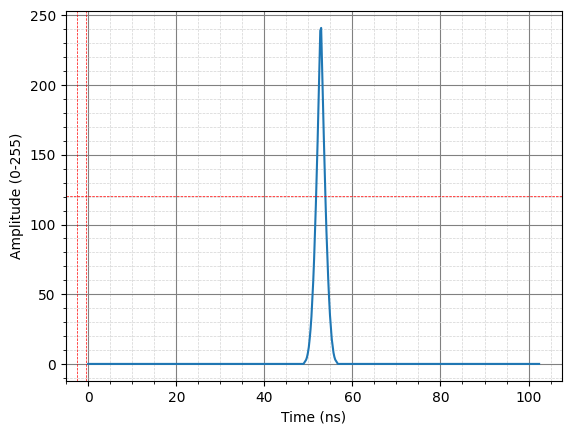

In [12]:
graph(u, phi, CSV_FILE)

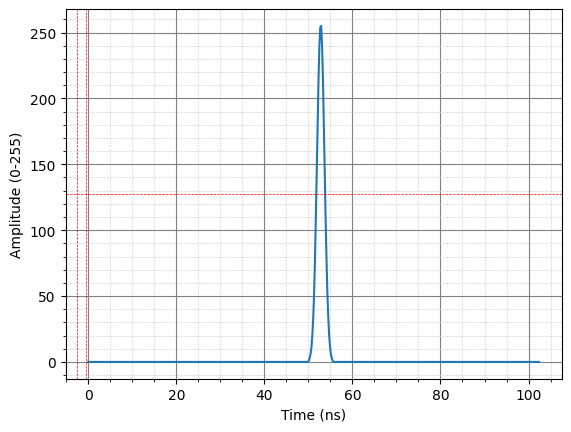

In [13]:
graph(I_opt, 1, CSV_FILE)